In [21]:
#| echo: true
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statistics

from scipy.stats import lognorm
from scipy import stats

import random


#filtered_skip_deliveries_at_Mzedi = pd.read_csv('../../data/interm_data/filtered_skip_deliveries_at_Mzedi.csv')
mzedi_entry_skip_data_stats = pd.read_csv('../../data/interm_data/mzedi_entry_skip_data_stats.csv')
mzedi_entry_skip_data_stats=mzedi_entry_skip_data_stats.set_index(mzedi_entry_skip_data_stats.columns[0])
mzedi_entry_skip_data_stats.index = mzedi_entry_skip_data_stats.index.rename('')
mzedi_entry_skip_data_stats.dropna(inplace=True)

ramping_data = pd.read_csv('../../data/interm_data/ramping_data.csv')
ramping_data=ramping_data.set_index(ramping_data.columns[0])
ramping_data.index = ramping_data.index.rename('')
ramping_data.dropna(inplace=True)



listAreas = ['Bangwe','BCA','Naizi','Chigumula']
print(ramping_data)
areas_coupling = pd.DataFrame(columns = ['ramps','avg_diff','ramps_OF', '#_dump', '#_ramps'], index = listAreas)
#Weighted average based on number of ramps for that area

print(ramping_data[ramping_data.index.str.contains('Naizi', regex=False)].number_ramps.sum())
for areas in listAreas:
    areas_coupling.loc[areas]['ramps'] = np.average(ramping_data[ramping_data.index.str.contains(areas, regex=False)].avg_ramp, weights=ramping_data[ramping_data.index.str.contains(areas, regex=False)].number_ramps)
    areas_coupling.loc[areas]['ramps_OF'] = np.average(ramping_data[ramping_data.index.str.contains(areas, regex=False)].days_overfull_prop, weights=ramping_data[ramping_data.index.str.contains(areas, regex=False)].number_days)
    areas_coupling.loc[areas]['avg_diff']=  mzedi_entry_skip_data_stats.loc[mzedi_entry_skip_data_stats.index.str.contains(areas,regex=False)]['median'].mean()
    areas_coupling.loc[areas]['#_dump']=  mzedi_entry_skip_data_stats.loc[mzedi_entry_skip_data_stats.index.str.contains(areas,regex=False)]['#'].sum()
    areas_coupling.loc[areas]['#_ramps'] = ramping_data[ramping_data.index.str.contains(areas, regex=False)].number_ramps.sum()

    
    
(areas_coupling.dropna(inplace=True))
areas_coupling['calc_OF'] = (areas_coupling['avg_diff']-(1/areas_coupling['ramps']))/(areas_coupling['avg_diff'])
print(areas_coupling)

## Compare numbers of ramps vs numbers of arrivals in same period
## Geographical trend of mzedi arrivals
## Start with model creation

# # for areas in listAreas:
# #     print(areas + " average time between collections: " +str(mzedi_entry_skip_data_stats.loc[mzedi_entry_skip_data_stats.index.str.contains(areas,regex=False)]['median'].mean()))


                       avg_ramp  number_ramps  days_overfull_prop  number_days
                                                                              
Bangwe_Organic_1       0.215060          24.0            0.258160        337.0
Bangwe_inorganic_1     0.489648          23.0            0.724771        327.0
Bangwe_inorganic_2     0.399566          16.0            0.737255        255.0
BCA_Organic_1          0.091083          11.0            0.386293        321.0
BCA_Organic_2          0.076705           2.0            0.000000         54.0
BCA_inorganic_1        0.063115           6.0            0.535928        334.0
BCA_inorganic_2        0.038462           1.0            0.627119        177.0
Naizi_Organic_1        0.045997           8.0            0.209877        324.0
Naizi_inorganic_1      0.144495          15.0            0.292899        338.0
Chigumula_Organic_1    0.157674          21.0            0.183230        322.0
Chigumula_Organic_2    0.127013          13.0       

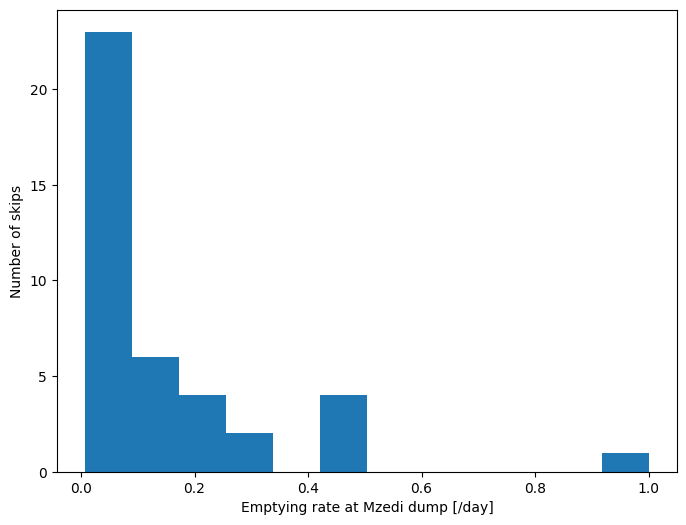

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
plt.hist(1/mzedi_entry_skip_data_stats['median'].values, bins=len(list_ramps))
plt.xlabel('Emptying rate at Mzedi dump [/day]')
plt.ylabel('Number of skips')
plt.show()
plt.close('all')

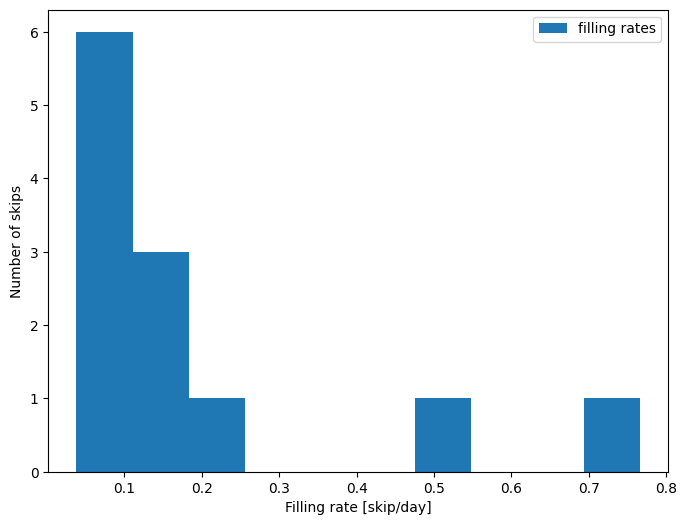

In [32]:
list_ramps = [0.215,0.766,0.541,0.091,0.077,0.063,0.038,0.046,0.144,0.158,0.127,0.056]
fig, ax = plt.subplots(figsize=(8,6))
#params = stats.fit(lognorm, list_ramps, [(0, 50), (0, 200)])
# arg = params[:-2]
# loc = params[-2]
# scale = params[-1]


# pdf_fitted = lognorm.cdf(1,params)
#params.plot(ax=ax)
ax.hist(list_ramps, bins=10, label='filling rates')
#plt.title('lognormal fit to the filling rates data')
plt.legend()
plt.ylabel('Number of skips')
plt.xlabel('Filling rate [skip/day]')
plt.show()
plt.close('all')

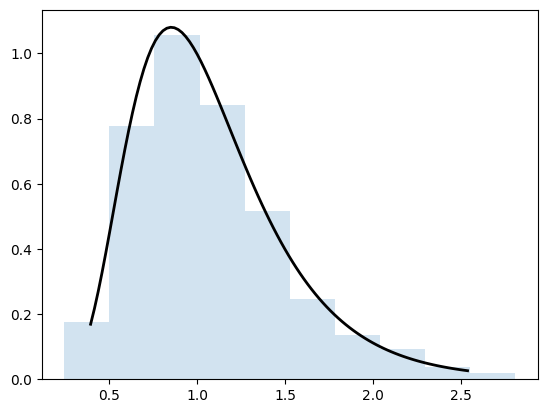

In [15]:
fig, ax = plt.subplots()
s=0.4
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
r = lognorm.rvs(s, size=1000)
rv = lognorm(s)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
#ax.legend(loc='best', frameon=False)
plt.show()